# Yüklemeler ve Kurulum

In [1]:
from google.colab import drive

In [2]:
drive.mount("/gdrive")

Mounted at /gdrive


In [3]:
%cd /gdrive

/gdrive


In [ ]:
!ls "/gdrive/MyDrive/dict.csv"

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [67]:
dataFrame = pd.read_csv("/gdrive/MyDrive/dict.xlsx")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x90 in position 22: invalid start byte

In [39]:
pip install apyori

In [40]:
from apyori import apriori

In [41]:
dataFrame.describe()

,source,target
count,7501,7501
unique,7501,5176
top,S1,cookies
freq,1,223


# Apriori Algoritması

In [10]:
lst = []
for i in range(0, len(dataFrame)):
    row_values = [str(value) for value in dataFrame.iloc[i].dropna()]
    lst.append(row_values)

In [11]:
lst

[['S1',
  'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil'],
 ['S2', 'burgers,meatballs,eggs'],
 ['S3', 'chutney'],
 ['S4', 'turkey,avocado'],
 ['S5', 'mineral water,milk,energy bar,whole wheat rice,green tea'],
 ['S6', 'low fat yogurt'],
 ['S7', 'whole wheat pasta,french fries'],
 ['S8', 'soup,light cream,shallot'],
 ['S9', 'frozen vegetables,spaghetti,green tea'],
 ['S10', 'french fries'],
 ['S11', 'eggs,pet food'],
 ['S12', 'cookies'],
 ['S13', 'turkey,burgers,mineral water,eggs,cooking oil'],
 ['S14', 'spaghetti,champagne,cookies'],
 ['S15', 'mineral water,salmon'],
 ['S16', 'mineral water'],
 ['S17', 'shrimp,chocolate,chicken,honey,oil,cooking oil,low fat yogurt'],
 ['S18', 'turkey,eggs'],
 ['S19',
  'turkey,fresh tuna,tomatoes,spaghetti,mineral water,black tea,salmon,eggs,chicken,extra dark chocolate'],
 [

In [12]:
comb= list(apriori(lst, min_support= 0.018, min_confidence=0.18, min_lift=1, max_lenght=50 ))

In [13]:
comb

[]

# Kontroller

In [ ]:
item1='mineral water'
item21=""
item22=""
item31=""
item32=""
item33=""
counter = 0
for i in range(0, len(dataFrame)):
    if item1 in dataFrame.iloc[i].values:
        counter += 1
    elif item21 in dataFrame.iloc[i].values and item22 in dataFrame.iloc[i].values:
        counter += 1
    elif item31 in dataFrame.iloc[i].values and item32 in dataFrame.iloc[i].values and item33 in dataFrame.iloc[i].values:
        counter += 1
print(counter)
size=7501
support=counter/size
support

1788


0.23836821757099053

In [42]:
df= pd.DataFrame(comb)

In [43]:
df

""


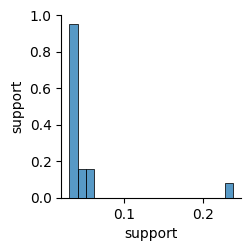

In [ ]:
sbn.pairplot(df)

In [ ]:
df["support"].sort_values(ascending=False).head()

5     0.039195
15    0.017064
0     0.016664
1     0.016131
3     0.015998
Name: support, dtype: float64

In [52]:
import networkx as nx

In [64]:
dataFrame

,Eslesme1,Eslesme2,Agirlik
0,Bitkisel Yag,Un,1
1,Tuz,Un,1
2,İnvert seker surubu,Un,1
3,Bitkisel Yag,Tuz,5
4,Bitkisel Yag,İnvert seker surubu,3
...,...,...,...
69,Pastorize Yumurta,seker,1
70,Bitkisel Yag,Pastorize Yumurta,1
71,?nvert seker surubu,Pastorize Yumurta,1
72,?nvert seker surubu,Kabarticilar,1


In [66]:
pd.to_numeric(dataFrame['Agirlik'], errors='coerce')

KeyError: 'Agirlik'

In [57]:
G = nx.from_pandas_edgelist(dataFrame, "Eslesme1", "Eslesme2", edge_attr="Agirlik", create_using=None)

NetworkXError: Invalid edge_attr argument: Agirlik

In [48]:
degree_centrality = nx.degree_centrality(G)
print("degree centrality:", degree_centrality)

degree centrality: {'S1': 7.888923950773115e-05, 'shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil': 7.888923950773115e-05, 'S2': 7.888923950773115e-05, 'burgers,meatballs,eggs': 7.888923950773115e-05, 'S3': 7.888923950773115e-05, 'chutney': 0.0001577784790154623, 'S4': 7.888923950773115e-05, 'turkey,avocado': 0.0001577784790154623, 'S5': 7.888923950773115e-05, 'mineral water,milk,energy bar,whole wheat rice,green tea': 7.888923950773115e-05, 'S6': 7.888923950773115e-05, 'low fat yogurt': 0.0035500157778479017, 'S7': 7.888923950773115e-05, 'whole wheat pasta,french fries': 0.0001577784790154623, 'S8': 7.888923950773115e-05, 'soup,light cream,shallot': 7.888923950773115e-05, 'S9': 7.888923950773115e-05, 'frozen vegetables,spaghetti,green tea': 7.888923950773115e-05, 'S10': 7.888923950773115e-05, 'french fries': 0.0

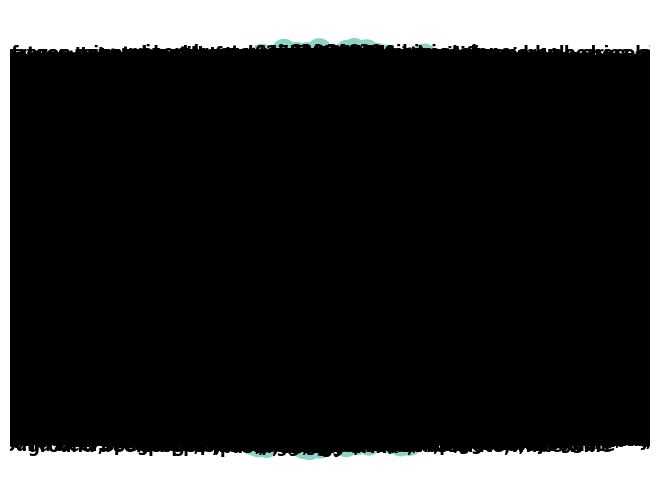

In [49]:
pos = nx.spring_layout(G)  # Düğümlerin yerleşimini belirle
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=list(degree_centrality.values()), cmap=plt.cm.Set3)
plt.show()

In [20]:
betweenness_centrality = nx.betweenness_centrality(G)
print("betweenness centrality:", betweenness_centrality)

betweenness centrality: {0: 0.09064327485380116, 1: 0.09064327485380116, 2: 0.09064327485380118, 3: 0.09064327485380118, 4: 0.09064327485380116, 5: 0.09064327485380118, 6: 0.09064327485380118, 7: 0.09064327485380116, 8: 0.09064327485380118, 9: 0.09064327485380118, 10: 0.09064327485380118, 11: 0.09064327485380118, 12: 0.09064327485380118, 13: 0.09064327485380116, 14: 0.09064327485380115, 15: 0.09064327485380115, 16: 0.09064327485380118, 17: 0.09064327485380116, 18: 0.09064327485380116, 19: 0.09064327485380118}


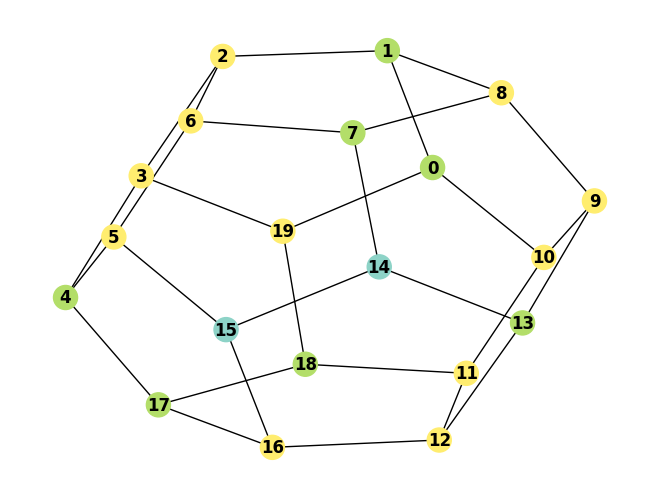

In [31]:
pos = nx.spring_layout(G)  # Düğümlerin yerleşimini belirle
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=list(betweenness_centrality.values()), cmap=plt.cm.Set3)
plt.show()

In [21]:
closeness_centrality = nx.closeness_centrality(G)
print("closeness centrality:", closeness_centrality)

closeness centrality: {0: 0.38, 1: 0.38, 2: 0.38, 3: 0.38, 4: 0.38, 5: 0.38, 6: 0.38, 7: 0.38, 8: 0.38, 9: 0.38, 10: 0.38, 11: 0.38, 12: 0.38, 13: 0.38, 14: 0.38, 15: 0.38, 16: 0.38, 17: 0.38, 18: 0.38, 19: 0.38}


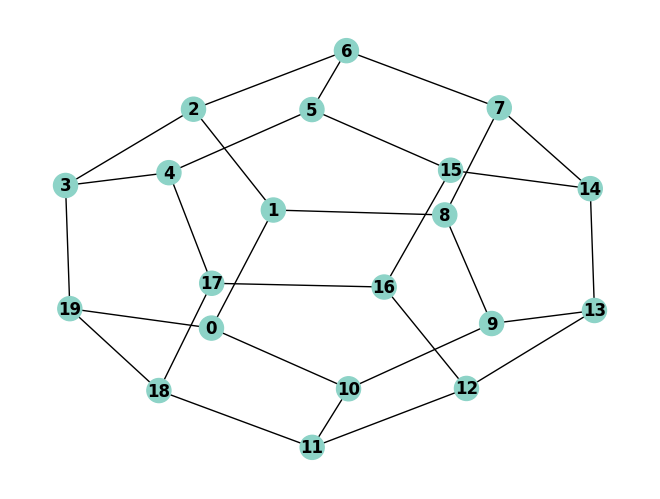

In [28]:
pos = nx.spring_layout(G)  # Düğümlerin yerleşimini belirle
nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=list(closeness_centrality.values()), cmap=plt.cm.Set3)
plt.show()

In [22]:
pip install --upgrade networkx

In [23]:
pip install python-louvain

In [24]:
louvain_partition = nx.community.best_partition(G)
print("louvain partition:", louvain_partition)

AttributeError: module 'networkx.algorithms.community' has no attribute 'best_partition'

In [25]:
triangle_count = sum(nx.triangles(G).values()) / 3
print("Üçgen Sayısı:", triangle_count)

Üçgen Sayısı: 0.0


In [35]:
import csv
from itertools import combinations
from collections import Counter

# CSV dosyasını oku
with open("/gdrive/MyDrive/Calisma_ortami/sepet.csv", newline='', encoding='utf-8') as csvfile:
    meyve_listesi = [row for row in csv.reader(csvfile)]

# Tüm meyveleri içeren bir liste oluştur
tum_meyveler = [meyve for satir in meyve_listesi for meyve in satir]

# Benzersiz meyveleri içeren bir set oluştur
benzersiz_meyveler = set(tum_meyveler)

# Tüm ikili kombinasyonları oluştur
ikili_kombinasyonlar = list(combinations(benzersiz_meyveler, 2))

# Her ikili kombinasyonun geçtiği satır sayısını bul
ikili_kombinasyon_sayilari = Counter(tuple(sorted(ikili)) for satir in meyve_listesi for ikili in combinations(satir, 2))

# Sonuçları yazdır
for ikili, sayi in ikili_kombinasyon_sayilari.items():
    print(f"{ikili}: {sayi} satırda geçiyor.")